<a href="https://colab.research.google.com/github/ano74/BCS_Drowsiness_Detection/blob/main/Mini_Project_MNE/Analysis_Oddball_Anupama_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/BCS_drowsiness_detection

/content/drive/MyDrive/BCS_drowsiness_detection


In [ ]:
%matplotlib inline
import mne
import matplotlib.pyplot as plt

fname = "oddball-epo.fif"

epochs = mne.read_epochs(fname)

Reading /content/drive/MyDrive/BCS_drowsiness_detection/oddball-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
epochs

Number of events,212
Events,standard/stimulus: 106target/stimulus: 106
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


## Evoked

The `mne.Evoked` object can be used to average an epoched dataset over trials

In [ ]:
target = epochs["target"].average()
target

Condition,target/stimulus
Data kind,average
Timepoints,71 samples
Channels,63 channels
Number of averaged epochs,106
Time range (secs),-0.2 – 0.5
Baseline (secs),-0.200 – 0.000 s


In [ ]:
standard = epochs["standard"].average()
standard

Condition,standard/stimulus
Data kind,average
Timepoints,71 samples
Channels,63 channels
Number of averaged epochs,106
Time range (secs),-0.2 – 0.5
Baseline (secs),-0.200 – 0.000 s


In [ ]:
epochs[:].get_data().shape

<ipython-input-8-8a278c97eabb>:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs[:].get_data().shape


(212, 64, 71)

In [ ]:
epochs["target"].get_data().shape

<ipython-input-9-fecd4d2f0953>:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs["target"].get_data().shape


(106, 64, 71)

In [ ]:
target.get_data().shape

(63, 71)

In [ ]:
target.info['ch_names']

['FP1',
 'FP2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'SO1',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'SO2',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'FCz']

In [ ]:
dir(target)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aspect_kind',
 '_data',
 '_decim',
 '_get_channel_positions',
 '_handle_tmin_tmax',
 '_pick_drop_channels',
 '_pick_projs',
 '_projector',
 '_raw_times',
 '_reconstruct_proj',
 '_repr_html_',
 '_set_channel_positions',
 '_set_legacy_nfft_default',
 '_set_times',
 '_size',
 '_times_readonly',
 '_update_first_last',
 'add_channels',
 'add_proj',
 'add_reference_channels',
 'animate_topomap',
 'anonymize',
 'apply_baseline',
 'apply_function',
 'apply_hilbert',
 'apply_proj',
 'as_type',
 'baseline',
 'ch_names',
 'comment',
 'compensation_grade',
 'compute_psd',
 'compute_tfr',
 'copy',
 'crop

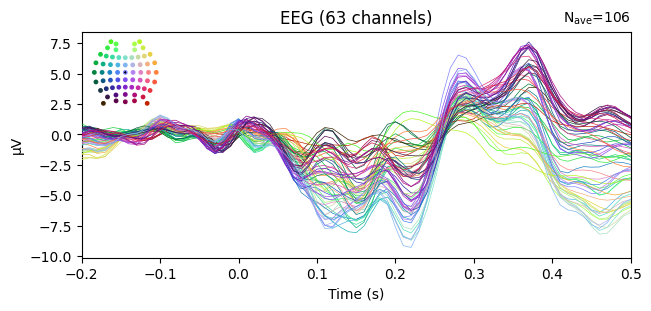

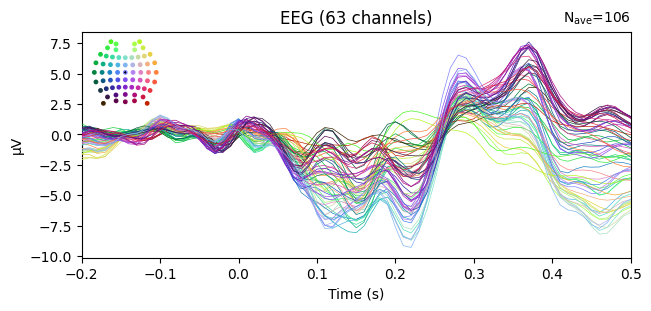

In [ ]:
target.plot()

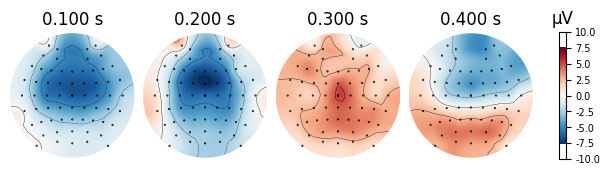

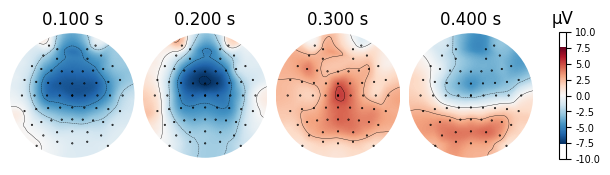

In [ ]:
target.plot_topomap(times=[0.1,0.2,0.3,0.4])

No projector specified for this dataset. Please consider the method self.add_proj.


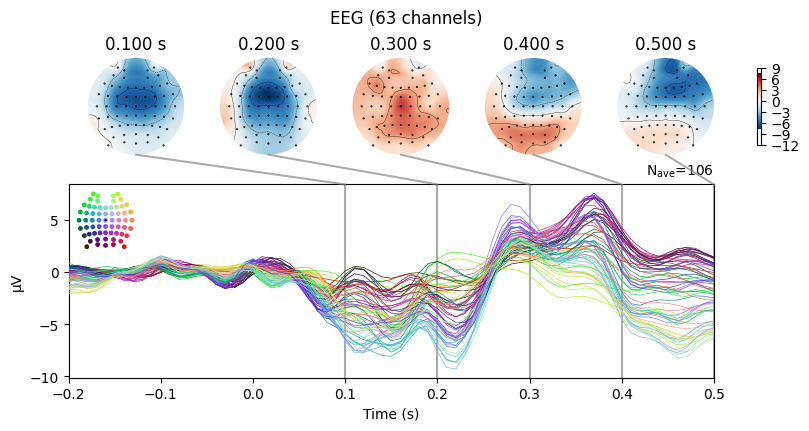

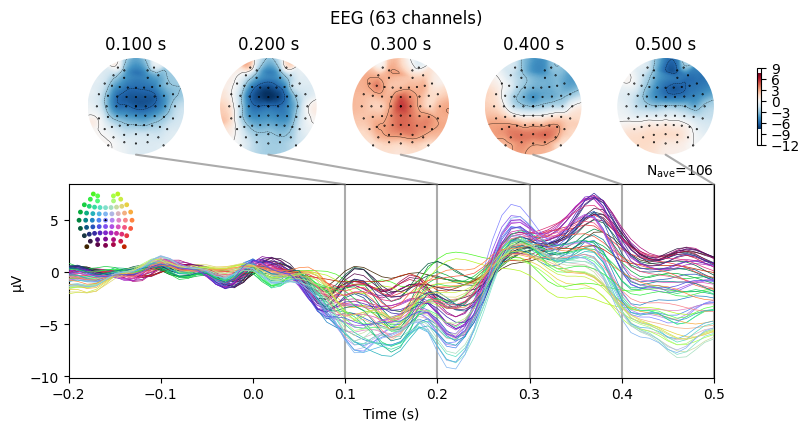

In [ ]:
target.plot_joint(times=[0.1,0.2,0.3,0.4, 0.5])

No projector specified for this dataset. Please consider the method self.add_proj.


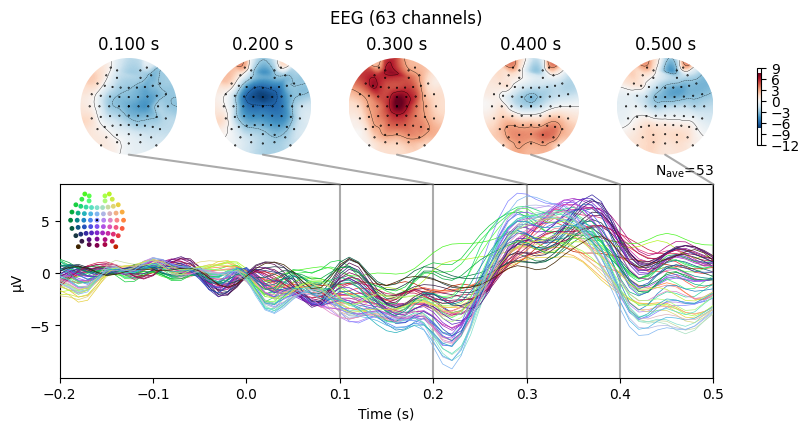

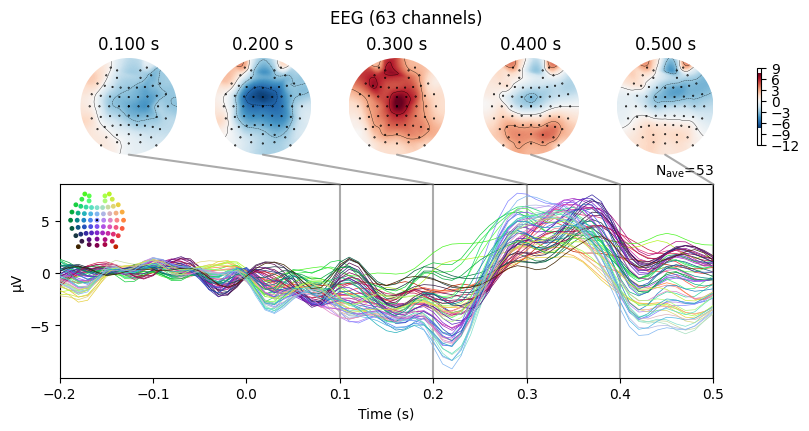

In [ ]:
diff = mne.combine_evoked((target,-standard), weights = [1,1])
diff.plot_joint(times=[0.1,0.2,0.3,0.4,0.5])

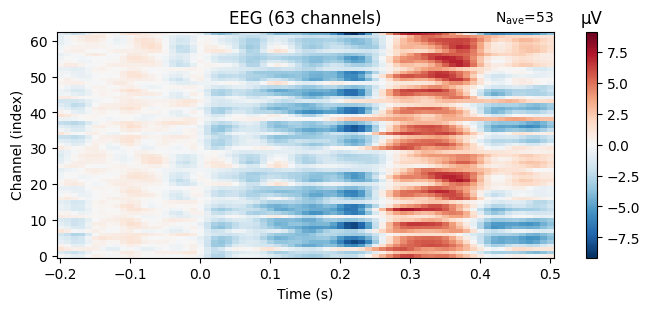

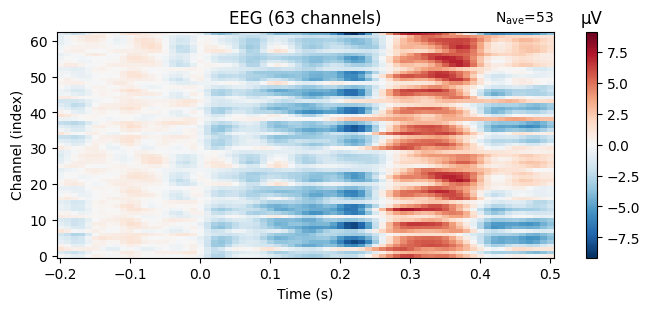

In [ ]:
diff.plot_image()

In [ ]:
rois = mne.channels.make_1020_channel_selections(diff.info, midline = "z12")

In [ ]:
rois

{'Left': array([25, 57, 58, 20, 53, 21, 48, 16, 49, 12, 44, 11, 40,  7, 39,  3, 34,
         2, 31, 30]),
 'Midline': array([27, 28, 26, 59, 54, 55, 22, 17, 18, 50, 46, 13, 45, 62,  9,  8,  4,
        36, 35,  1,  0, 38, 43]),
 'Right': array([29, 61, 60, 24, 56, 23, 52, 19, 51, 14, 15, 47, 41, 10, 42,  5, 37,
         6, 32, 33])}

[<Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>]

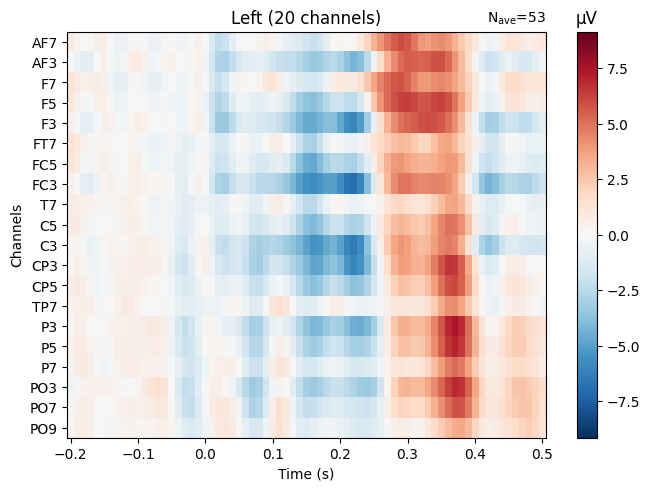

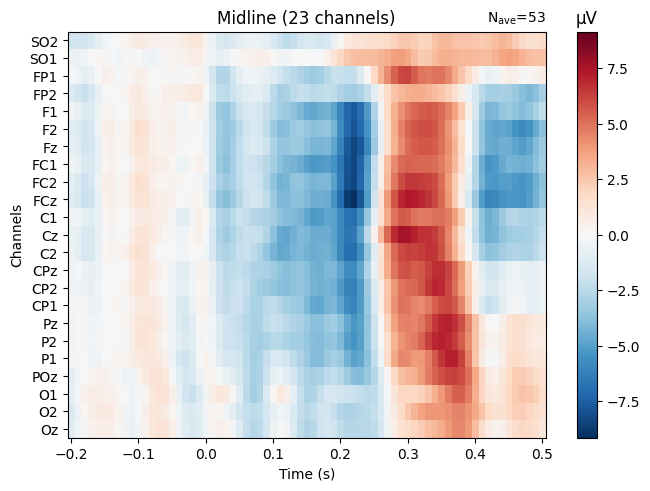

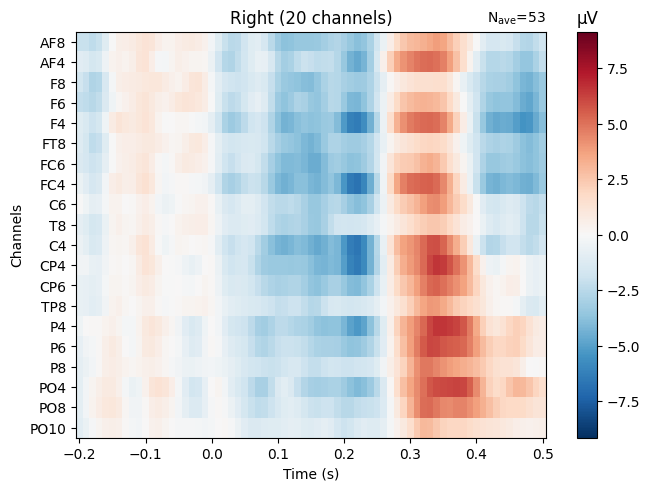

In [ ]:
diff.plot_image(group_by=rois, show=False, show_names="all")

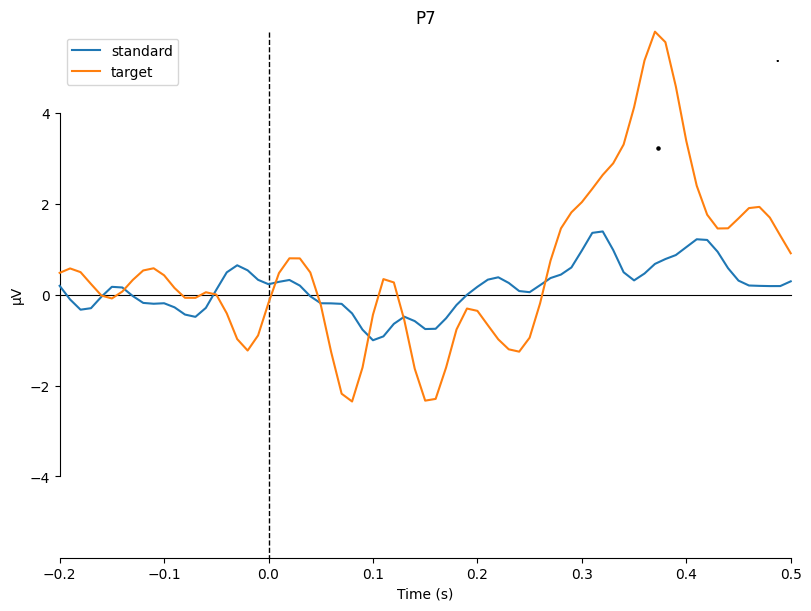

[<Figure size 800x600 with 2 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds({"standard":standard,
                              "target":target},picks=(20))

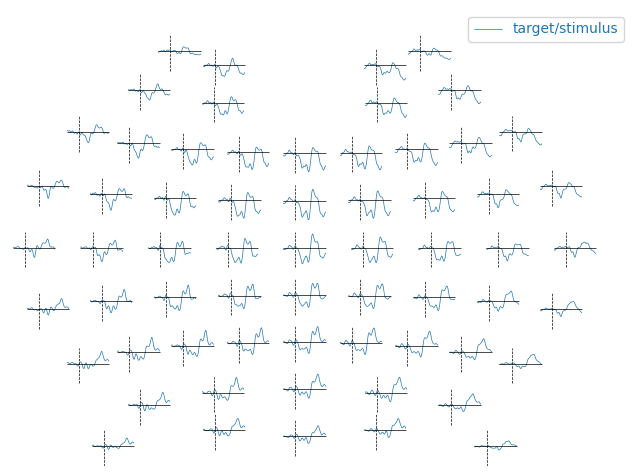

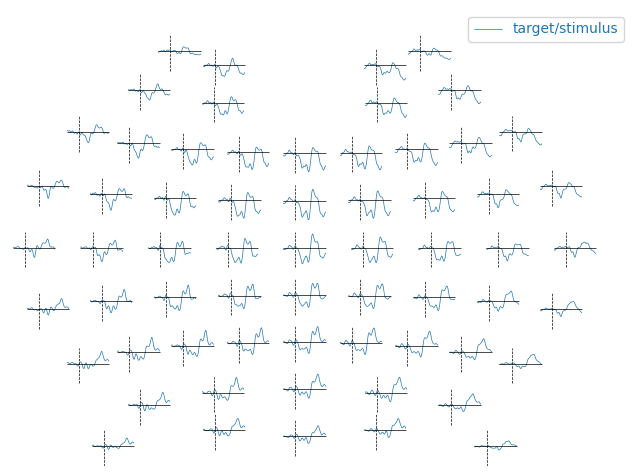

In [ ]:
target.plot_topo()

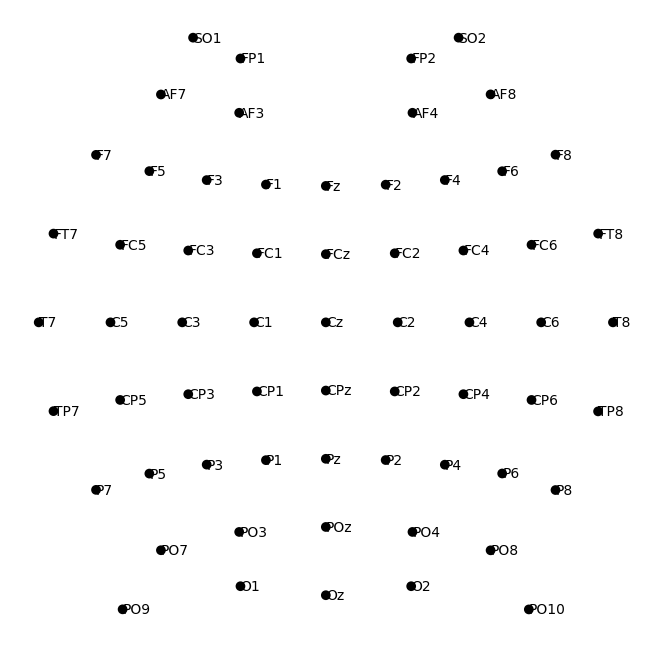

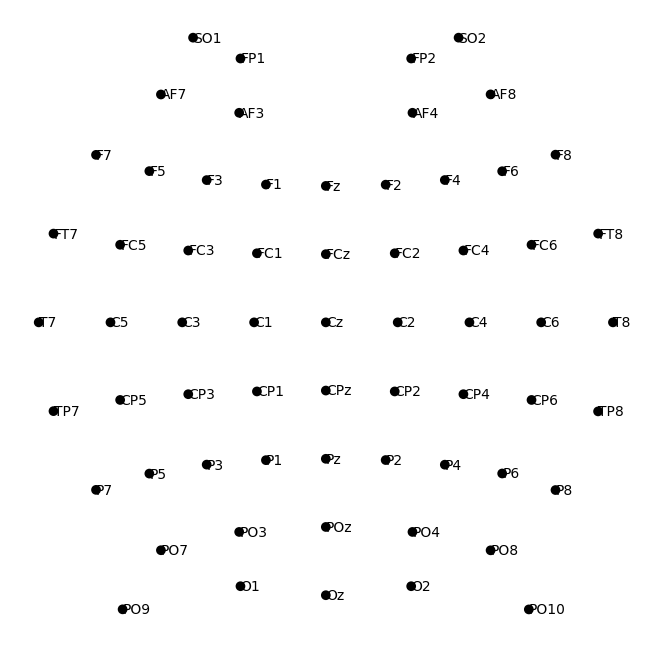

In [ ]:
target.plot_sensors(show_names = True)

In [ ]:
target.data

array([[-5.68805466e-07, -5.60060395e-07, -6.55238169e-07, ...,
        -3.85404491e-06, -3.45361522e-06, -3.26392104e-06],
       [-1.48854439e-06, -1.41685884e-06, -1.47420636e-06, ...,
        -6.65196363e-06, -6.27189332e-06, -5.97768914e-06],
       [ 8.80848944e-07,  5.63899763e-07,  3.62404080e-07, ...,
        -5.10263717e-07, -4.15790572e-07, -5.00895978e-07],
       ...,
       [-4.52863369e-08,  3.07158609e-07,  3.95462381e-07, ...,
         2.29952673e-06,  1.82435755e-06,  1.29285579e-06],
       [-9.30475047e-08,  1.04775796e-07,  2.31788558e-07, ...,
         1.35376777e-06,  8.96247282e-07,  5.06420353e-07],
       [-1.27232296e-06, -1.18769815e-06, -1.38561450e-06, ...,
        -6.36019615e-06, -5.62629469e-06, -5.33761793e-06]])

In [ ]:
x = target.data

In [ ]:
ch_names = target.info['ch_names']
ch_names

['FP1',
 'FP2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'SO1',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'SO2',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'FCz']

In [ ]:
channel = 'C4'
chIndex = ch_names.index(channel)

Text(0.5, 0, 'Time Samples')

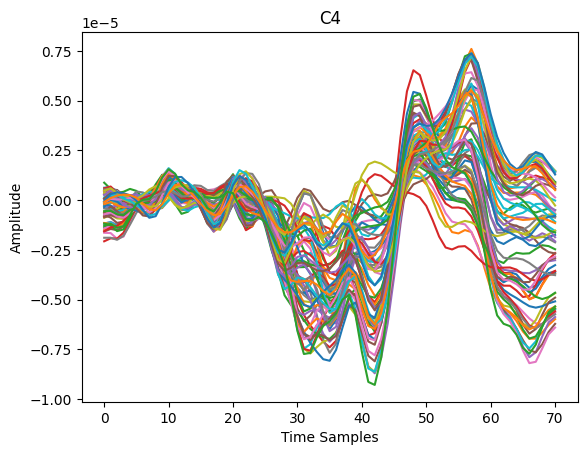

In [ ]:
plt.plot(x.T)
plt.title(channel)
plt.ylabel("Amplitude")
plt.xlabel("Time Samples")

## Time-Frequency analysis

In [ ]:
epochs_for_tfr = mne.read_epochs("oddball-long-epo.fif")

Reading /content/drive/MyDrive/BCS_drowsiness_detection/oddball-long-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


<ipython-input-30-133bbfa2295e>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs_for_tfr.plot_psd(fmin=2, fmax=40)


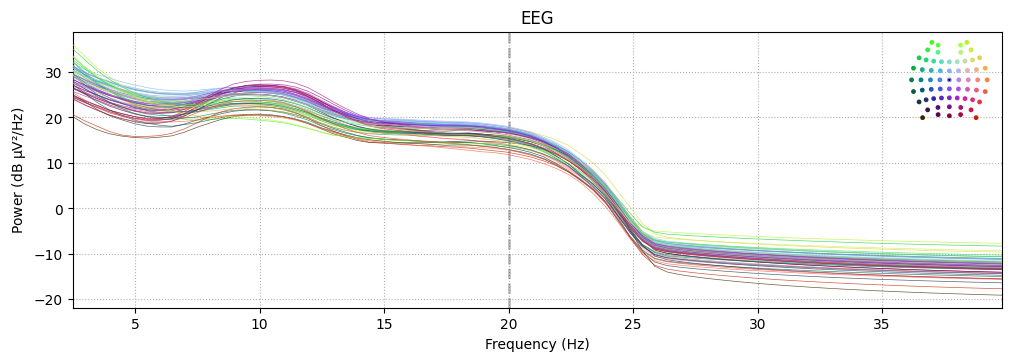

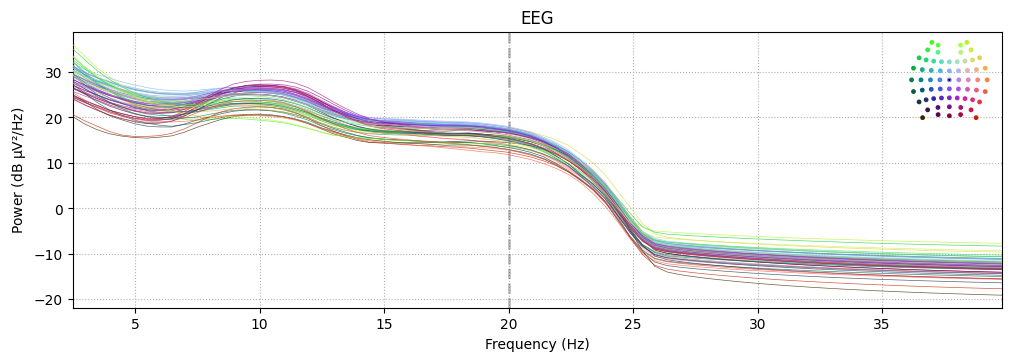

In [ ]:
epochs_for_tfr.plot_psd(fmin=2, fmax=40)

In [ ]:
from mne.time_frequency import tfr_morlet

In [ ]:
mne.time_frequency.tfr_morlet?

Object `mne.time_frequency.tfr_morlet` not found.


In [ ]:
freqs = list(range(3,30))
tfr_target = tfr_morlet(epochs_for_tfr["target"], freqs, 3, return_itc = False)
tfr_standard = tfr_morlet(epochs_for_tfr["standard"], freqs, 3, return_itc = False)

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


In [ ]:
tfr_target.data.shape #63 channels, 27 freqs,

(63, 27, 201)

No baseline correction applied


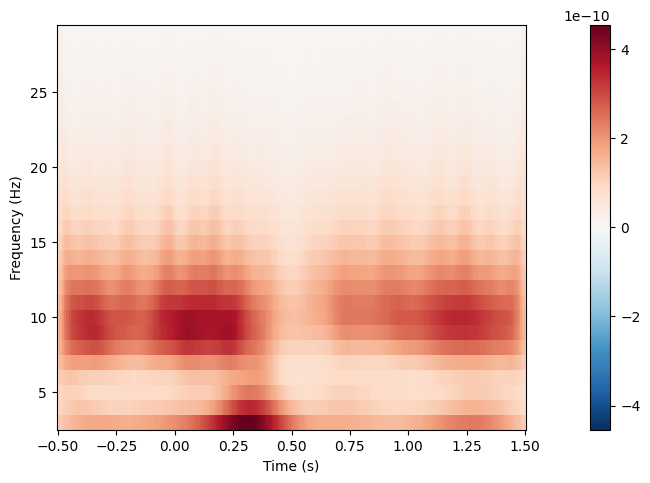

[<Figure size 640x480 with 2 Axes>]

In [ ]:
tfr_target.plot(picks=27)

In [ ]:
tfr_contrast = mne.combine_evoked((tfr_standard, tfr_target), (-0.5, 0.5))
tfr_contrast.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Data type,Average Power Estimates
Data source,Epochs
Number of epochs,63
Dims,"channel, freq, time"
Estimation method,morlet
Number of channels,63
Number of timepoints,201
Number of frequency bins,27
Frequency range,3.00 – 29.00 Hz


No baseline correction applied
No baseline correction applied


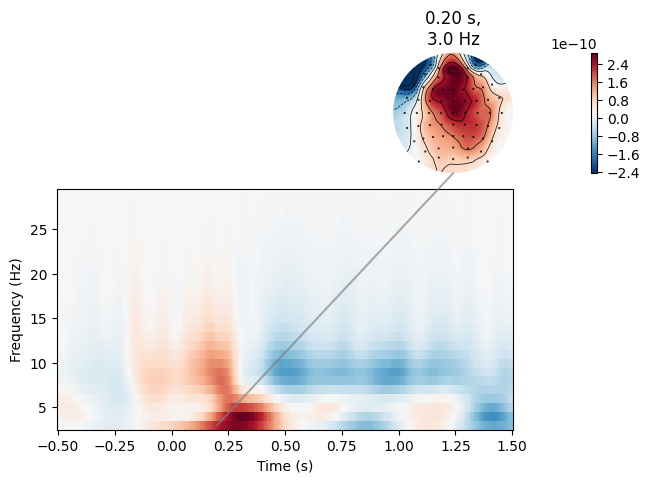

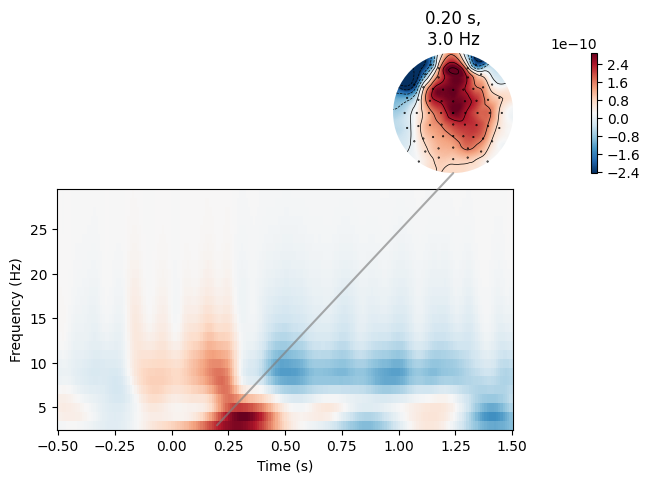

In [ ]:
tfr_contrast.plot_joint()

No baseline correction applied


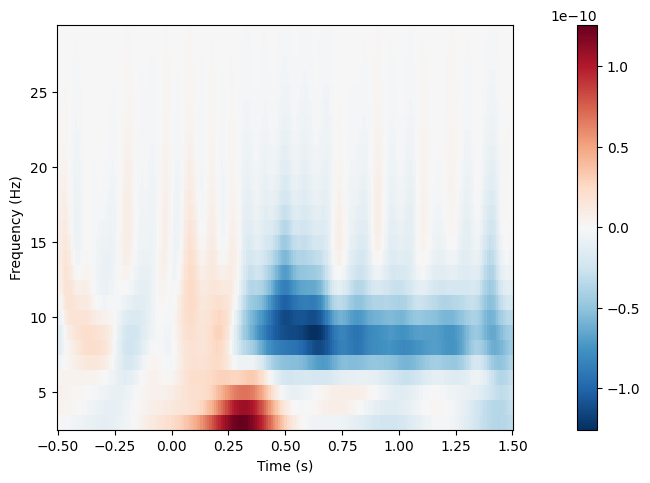

[<Figure size 640x480 with 2 Axes>]

In [ ]:
tfr_contrast.plot(picks=[27])